In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.ndimage

In [2]:
#Load mean image
root_folder = '../Images/'
mean_image = scipy.ndimage.imread('mean_image.jpg')

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()


In [3]:
#helper methods
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def replace_background(img, mean_image=mean_image):
    g = rgb2gray(mean_image)
    cv2.normalize(g, g, 0, 255, cv2.NORM_MINMAX)
    back = np.where(g<20)
    replaced = img.copy()
    replaced[back[0],back[1],0] = 0
    replaced[back[0],back[1],1] = 0
    replaced[back[0],back[1],2] = 0
    return replaced

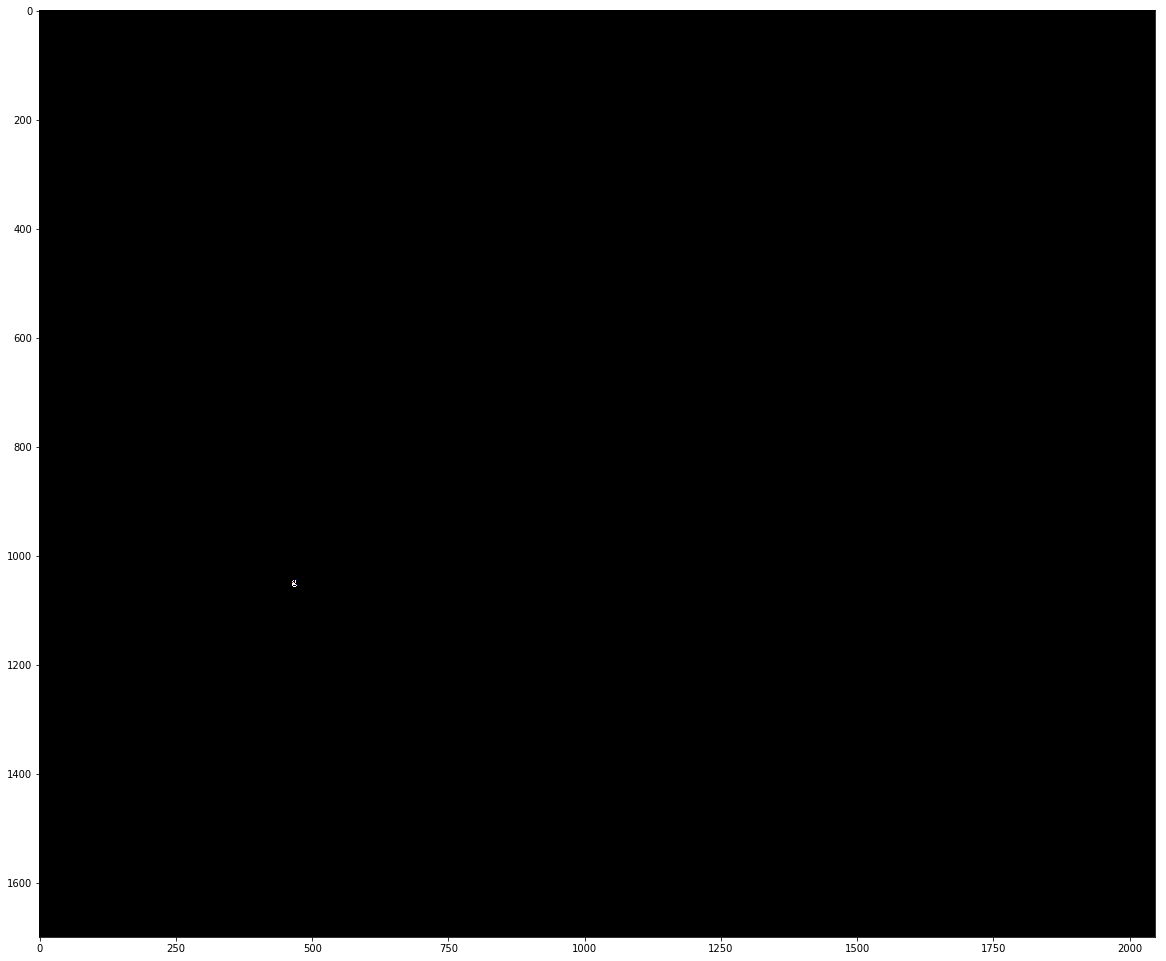

In [6]:
# Read the images to be aligned

im1 =  cv2.imread(root_folder+"ID4491.tif",1);
im2 =  cv2.imread(root_folder+"ID4492.tif",1);
 
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 100;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
plt.figure(figsize=[20,20])
im2_aligned = replace_background(im2_aligned)
sub = cv2.absdiff(im1,im2_aligned)
img = sub
img = np.array(img,dtype=np.uint8)
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()